#Quantium Data Analytics Virtual Experience Program

In [2]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

##TASK1
Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#load transaction data
transaction_df = pd.read_excel('/content/drive/MyDrive/QVI_transaction_data.xlsx')
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3
2,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9
3,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0
4,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8


In [5]:
#transaction data summary
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  float64       
 2   LYLTY_CARD_NBR  264836 non-null  float64       
 3   TXN_ID          264836 non-null  float64       
 4   PROD_NBR        264836 non-null  float64       
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  float64       
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 16.2+ MB


In [6]:
transaction_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


From the above,the mean and std for the 'TOT_SALES' column are 7.3 and 3.0 respectively. However, the maximum value is 650 which is a large deviation from the mean. Therefore, outliers can be identified in the product quantity column. 

In [7]:
#as the date column is not presented in an ordered manner

transaction_df['DATE'].min() #gives start date for time period

Timestamp('2018-07-01 00:00:00')

In [8]:
transaction_df['DATE'].max() #gives end date for time period

Timestamp('2019-06-30 00:00:00')

In [9]:

#checking for null values
transaction_df.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [10]:
#checking for duplicates
transaction_df.duplicated().sum()

1

In [11]:
#confirming duplicates 
duplicates = transaction_df[transaction_df.duplicated()]
duplicates

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,2018-10-01,107.0,107024.0,108462.0,45.0,Smiths Thinly Cut Roast Chicken 175g,2.0,6.0


In [12]:
#checking if the above entry is an actual duplicate
transaction_df.query('LYLTY_CARD_NBR==107024')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,2018-10-01,107.0,107024.0,108462.0,45.0,Smiths Thinly Cut Roast Chicken 175g,2.0,6.0
124844,2018-10-01,107.0,107024.0,108462.0,18.0,Cheetos Chs & Bacon Balls 190g,2.0,6.6
124845,2018-10-01,107.0,107024.0,108462.0,45.0,Smiths Thinly Cut Roast Chicken 175g,2.0,6.0
124846,2018-10-29,107.0,107024.0,108463.0,48.0,Red Rock Deli Sp Salt & Truffle 150G,2.0,5.4
124847,2018-12-09,107.0,107024.0,108464.0,107.0,Smiths Crinkle Cut French OnionDip 150g,2.0,5.2
124848,2019-01-30,107.0,107024.0,108466.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,2.0,11.8
124849,2019-03-17,107.0,107024.0,108467.0,40.0,Thins Chips Seasonedchicken 175g,2.0,6.6
124850,2019-04-22,107.0,107024.0,108468.0,37.0,Smiths Thinly Swt Chli&S/Cream175G,2.0,6.0


From the above query, there were only three purchases on the date: 2018-10-01. Three were made by the same Loyalty card number. However, the purchase for Smiths Thinly Cut Roast Chicken 175g was duplicated.

In [13]:
transaction_df.shape

(264836, 8)

In [14]:
#dropping the duplicate
transaction_df.drop_duplicates(inplace=True)
transaction_df.shape

(264835, 8)

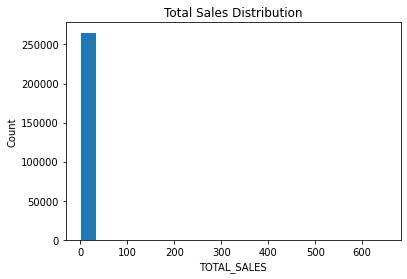

In [15]:
#checking the TOT_SALES distribution
plt.hist(transaction_df['TOT_SALES'], bins=20)
plt.xlabel('TOTAL_SALES')
plt.ylabel('Count')
plt.title('Total Sales Distribution')
plt.show()


The histogram above shows that the total sales falls between 0 and 50. However, in the previous dataset summary there were total sales of 650. These constitute the outliers.

In [16]:
#checking for transactions with 'TOT_SALES' greater than 100
transaction_df.query('TOT_SALES > 50')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226.0,226000.0,226201.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0
69763,2019-05-20,226.0,226000.0,226210.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0


From the above query, the same customer has bought Dorito Corn Chp Supreme 380g in bulk at the same quantity and shop. 

In [17]:
#dropping the two rows with 'TOT_SALES' of 650.0 using their index location
transaction_df = transaction_df.drop([69762, 69763])
transaction_df.query('TOT_SALES > 50')                         #To confirm if the rows were dropped

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [18]:
#creating a day column

transaction_df['DAY_OF_MONTH'] = transaction_df['DATE'].dt.day
transaction_df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY_OF_MONTH
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,17
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,14
2,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,20


In [20]:
#a month dictionary with month names as values and numbers as keys

month = {1:'January', 2:'Febraury', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

In [21]:
#creating a month column for each transaction

transaction_df['MONTH'] = (transaction_df['DATE'].dt.month).map(month)
transaction_df.tail(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY_OF_MONTH,MONTH
264833,2018-11-06,272.0,272379.0,270187.0,51.0,Doritos Mexicana 170g,2.0,8.8,6,November
264834,2018-12-27,272.0,272379.0,270188.0,42.0,Doritos Corn Chip Mexican Jalapeno 150g,2.0,7.8,27,December
264835,2018-09-22,272.0,272380.0,270189.0,74.0,Tostitos Splash Of Lime 175g,2.0,8.8,22,September


In [22]:
#identifying unique product names

transaction_df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [23]:
#using regex identifiers to extract digits in PEOD_NAME column as a new column showing product size 

transaction_df['PROD_SIZE'] = transaction_df['PROD_NAME'].str.extract("(\d+)")
transaction_df['PROD_SIZE'] = transaction_df['PROD_SIZE'].astype(int)

In [34]:
#creating a 'BRAND' column to identify brands from product names

transaction_df['BRAND'] = transaction_df['PROD_NAME'].str.extract("(\w+)")
transaction_df['BRAND'].nunique()

29

In [35]:
#identifying Unique brand names

transaction_df['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

From the brand names above, some brands are not spelled correctly or missing letters. RRD is also represented as 'Red', Natural and NCC are the 'Natural Chip company'. These brand names would be corrected below.

In [41]:
transaction_df['BRAND'].replace('NCC', 'Natural', inplace=True)
transaction_df['BRAND'].replace('RRD','Red', inplace=True)
transaction_df['BRAND'].replace('WW', 'Woolworths', inplace=True)
transaction_df['BRAND'].replace('Snbts', 'Sunbites', inplace=True)
transaction_df['BRAND'].replace('Smith', 'Smiths', inplace=True)
transaction_df['BRAND'].replace('Old', 'Old El Paso', inplace=True)
transaction_df['BRAND'].replace('Grain', 'GrnWves', inplace=True)
transaction_df['BRAND'].replace('Infzns', 'Infuzions', inplace=True)
transaction_df['BRAND'].replace('Dorito', 'Doritos', inplace=True)

transaction_df['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old El Paso', 'GrnWves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red', 'Pringles', 'Tyrrells', 'Cobs', 'French',
       'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

In [42]:
purchase_df = pd.read_csv('https://raw.githubusercontent.com/SandyCOG/Quantium-Data-Analytics-Virtual-Experience-Program/main/QVI_purchase_behaviour.csv')
purchase_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [43]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [44]:
#checking for missing values in the customer data

purchase_df.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [45]:
#checking for duplicates

purchase_df.duplicated().sum()

0

In [46]:
purchase_df['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [47]:
#unique values in Lifestage column

purchase_df['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [48]:
#merging both customer and transaction data

trans_pur_merged = pd.merge(transaction_df, purchase_df, on='LYLTY_CARD_NBR', how='right')
trans_pur_merged.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY_OF_MONTH,MONTH,PROD_SIZE,BRAND,BRAND1,BRAND2,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,17.0,October,175.0,Natural,Natural,Natural,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1.0,1002.0,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,16.0,September,150.0,Red,Red,Red,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1.0,1003.0,3.0,52.0,Grain Waves Sour Cream&Chives 210G,1.0,3.6,7.0,March,210.0,GrnWves,Grain,Grain,YOUNG FAMILIES,Budget
3,2019-03-08,1.0,1003.0,4.0,106.0,Natural ChipCo Hony Soy Chckn175g,1.0,3.0,8.0,March,175.0,Natural,Natural,Natural,YOUNG FAMILIES,Budget
4,2018-11-02,1.0,1004.0,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,2.0,November,160.0,Woolworths,WW,WW,OLDER SINGLES/COUPLES,Mainstream


In [49]:
trans_pur_merged.shape

(264834, 16)

In [52]:
trans_pur_merged.isna().sum()

DATE                1
STORE_NBR           1
LYLTY_CARD_NBR      0
TXN_ID              1
PROD_NBR            1
PROD_NAME           1
PROD_QTY            1
TOT_SALES           1
DAY_OF_MONTH        1
MONTH               1
PROD_SIZE           1
BRAND               1
BRAND1              1
BRAND2              1
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [53]:
trans_pur_merged.duplicated().sum()

0

In [54]:
trans_pur_merged[trans_pur_merged['DATE'].isna()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY_OF_MONTH,MONTH,PROD_SIZE,BRAND,BRAND1,BRAND2,LIFESTAGE,PREMIUM_CUSTOMER
221624,NaT,NaN,226000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OLDER FAMILIES,Premium


As I had previous dropped rows for loyalty card number 226000 with total sales equal to 650, this is resulted is null values in the corresponding customer data.

In [55]:
#dropping the row with NaN
trans_pur_merged = trans_pur_merged.dropna()
trans_pur_merged.isna().any().sum()                           # checking that they have been dropped

0

#Task 3:
Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia. 

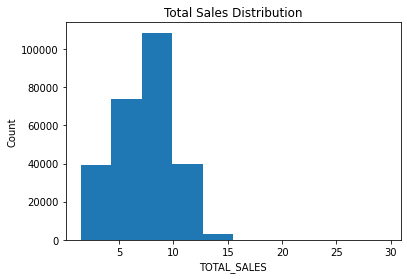

In [56]:
#plotting total sales distribution

plt.hist(trans_pur_merged['TOT_SALES'], bins=10)
plt.xlabel('TOTAL_SALES')
plt.ylabel('Count')
plt.title('Total Sales Distribution')
plt.show()

From the above histagram, most sales fall between 5 to 10 

In [57]:
#printing highest and lowest values for total sales and product quantity recorded

highest_total_sales = trans_pur_merged['TOT_SALES'].max()
lowest_total_sales = trans_pur_merged['TOT_SALES'].min()
highest_product_quantity = trans_pur_merged['PROD_QTY'].max()
lowest_product_quantity = trans_pur_merged['PROD_QTY'].min()

print(f'The highest total sales value is {highest_total_sales}')
print(f'The lowest total sales value is {lowest_total_sales}')
print(f'The highest product quantity sold is {highest_product_quantity}')
print(f'The lowest product quantity sold is {lowest_product_quantity}')

The highest total sales value is 29.5
The lowest total sales value is 1.5
The highest product quantity sold is 5.0
The lowest product quantity sold is 1.0


In [58]:
#what product was bought at the value of 29.5

trans_pur_merged.query('TOT_SALES==29.5')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY_OF_MONTH,MONTH,PROD_SIZE,BRAND,BRAND1,BRAND2,LIFESTAGE,PREMIUM_CUSTOMER
20349,2018-08-17,24.0,24095.0,20797.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,17.0,August,380.0,Smiths,Smithss,Smithss,RETIREES,Premium
39548,2019-05-20,44.0,44350.0,40394.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,20.0,May,380.0,Smiths,Smithss,Smithss,YOUNG FAMILIES,Budget
44849,2018-08-15,49.0,49303.0,45789.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,15.0,August,380.0,Smiths,Smithss,Smithss,OLDER FAMILIES,Premium
91451,2018-08-15,94.0,94148.0,93390.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,15.0,August,380.0,Smiths,Smithss,Smithss,MIDAGE SINGLES/COUPLES,Mainstream
118380,2019-05-20,118.0,118021.0,120799.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,20.0,May,380.0,Smiths,Smithss,Smithss,RETIREES,Mainstream
187011,2019-05-14,190.0,190113.0,190914.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,14.0,May,380.0,Smiths,Smithss,Smithss,OLDER FAMILIES,Mainstream
190553,2019-05-19,194.0,194308.0,194516.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,19.0,May,380.0,Smiths,Smithss,Smithss,OLDER SINGLES/COUPLES,Premium


Smiths Crnkle Chip Orgnl Big Bag 380g is the product with the highest total sales and highest product quantity sold to a customer. It was purchased by both premium, budget and mainstream customers.

In [59]:
#what category of customers are making the highest amount of purchases, that is in terms of Total sales?

trans_pur_merged.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

PREMIUM_CUSTOMER
Budget        676211.55
Mainstream    750744.50
Premium       506152.95
Name: TOT_SALES, dtype: float64

For customer segments, Mainstream customers have the highest total sales followed by Budget customers and finally, Premium customers. This means that majority of the sales are pushed by Mainstream customers.


In [60]:
trans_pur_merged.groupby('LIFESTAGE')['TOT_SALES'].sum()

LIFESTAGE
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES               50433.45
OLDER FAMILIES            352467.20
OLDER SINGLES/COUPLES     402420.75
RETIREES                  366470.90
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
Name: TOT_SALES, dtype: float64

Older singles/couples have the higest total sales, while new families have the least amount of sales. 

Text(0.5, 1.0, 'Count of Customers per category')

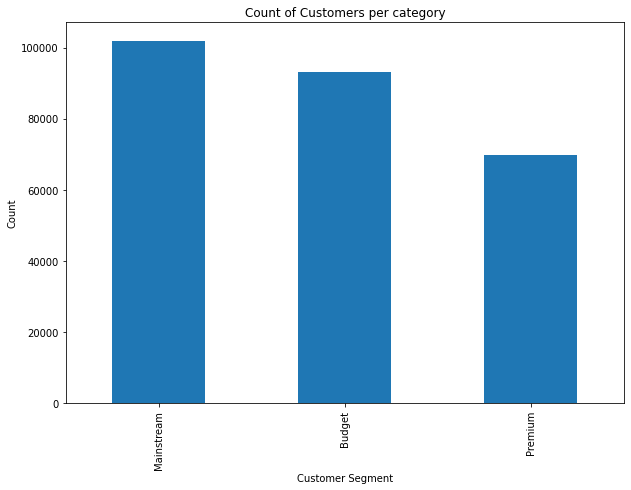

In [61]:
#what category of customers has the higest count?

trans_pur_merged['PREMIUM_CUSTOMER'].value_counts().plot(kind='bar', figsize=(10,7))
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.title('Count of Customers per category')

Mainstream customers also have the highest total count which could contribute to why they have the highest total sales.

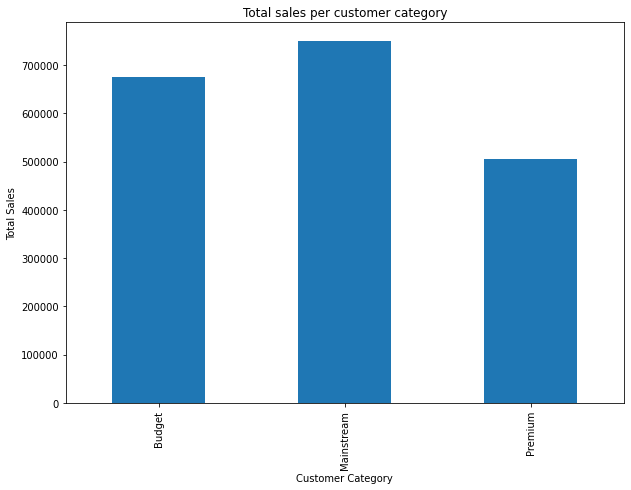

In [62]:
#what category of customers make the most purchases?

trans_pur_merged.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().plot(kind='bar', figsize=(10,7))
plt.xlabel('Customer Category')
plt.ylabel('Total Sales')
plt.title('Total sales per customer category')
plt.show()

Text(0.5, 1.0, 'Total sales per top 10 stores')

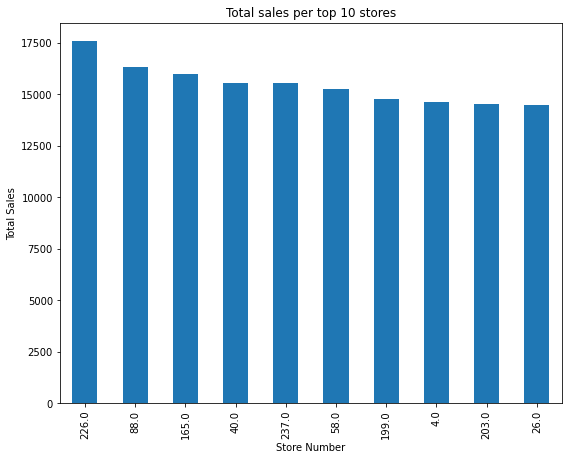

In [63]:
#plotting total sales of top 10 stores

trans_pur_merged.groupby('STORE_NBR')['TOT_SALES'].sum().nlargest(10).plot(kind='bar',figsize=(9,7))
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Total sales per top 10 stores')

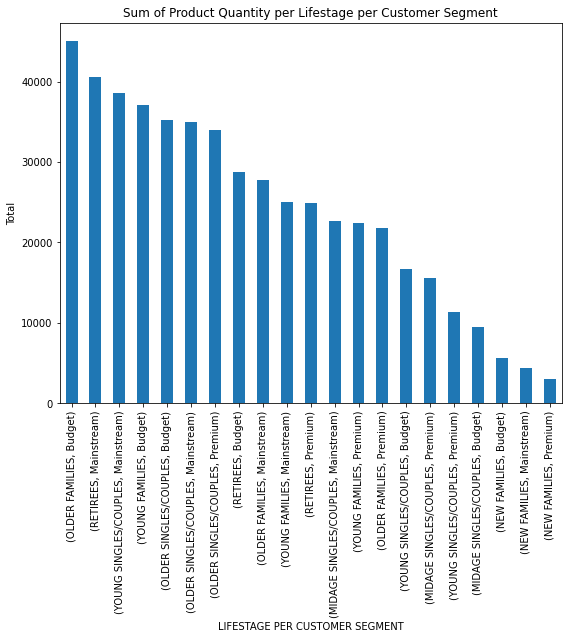

In [64]:
trans_pur_merged.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(9,7))
plt.xlabel('LIFESTAGE PER CUSTOMER SEGMENT')
plt.ylabel('Total')
plt.title('Sum of Product Quantity per Lifestage per Customer Segment')
plt.show()

Older families on a budget make more purchases that every other segmentation of customers. 

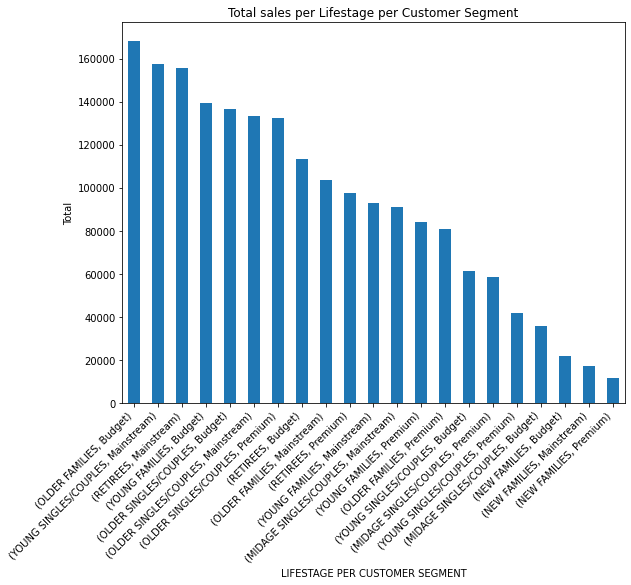

In [65]:
trans_pur_merged.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(9,7))
plt.xlabel('LIFESTAGE PER CUSTOMER SEGMENT')
plt.ylabel('Total')
plt.title('Total sales per Lifestage per Customer Segment')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

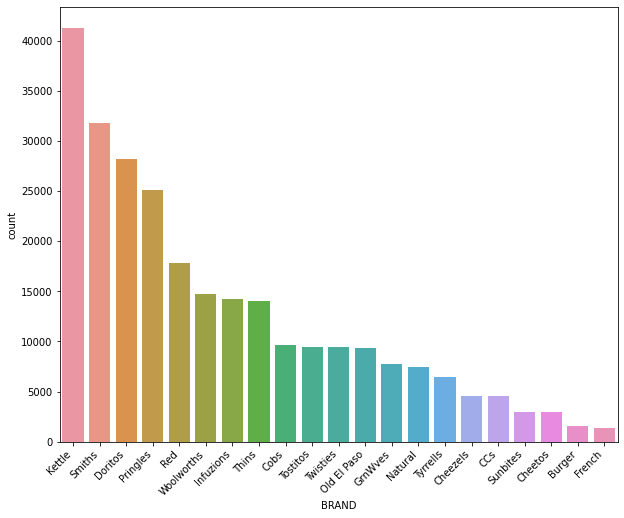

In [68]:
#visualizing count of brands
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='BRAND', data=trans_pur_merged, order = trans_pur_merged['BRAND'].value_counts().index,ax=ax)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

Kettle is the most popular brand category while French fries is the least popular brand. 

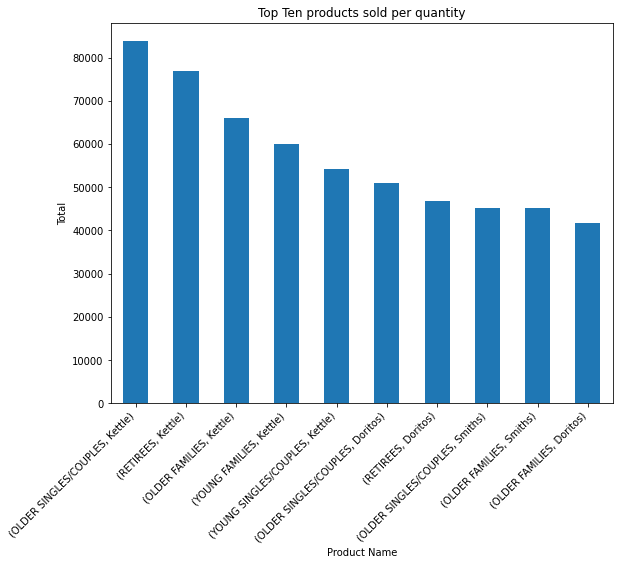

In [69]:
#what are the top products bought according to the Lifestage category?

trans_pur_merged.groupby(['LIFESTAGE', 'BRAND'])['TOT_SALES'].sum().nlargest(10).plot(kind='bar',figsize=(9,7))
plt.xlabel('Product Name')
plt.ylabel('Total')
plt.title('Top Ten products sold per quantity')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

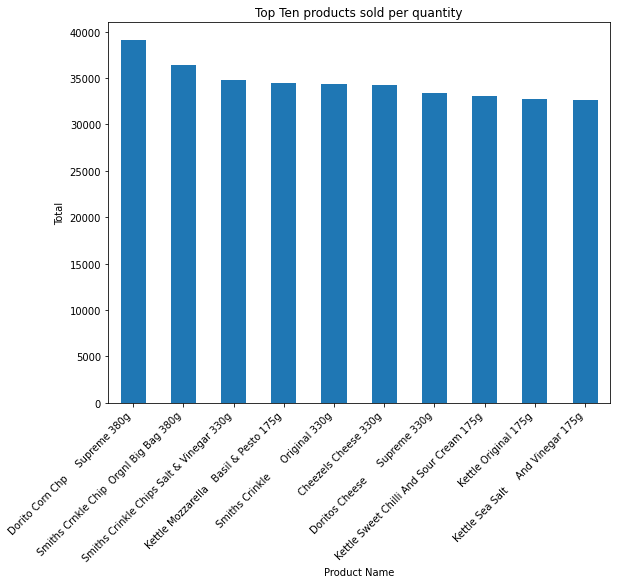

In [71]:
#what are the top 10 products sold in this period?

trans_pur_merged.groupby('PROD_NAME')['TOT_SALES'].sum().nlargest(10).plot(kind='bar',figsize=(9,7))
plt.xlabel('Product Name')
plt.ylabel('Total')
plt.title('Top Ten products sold per quantity')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

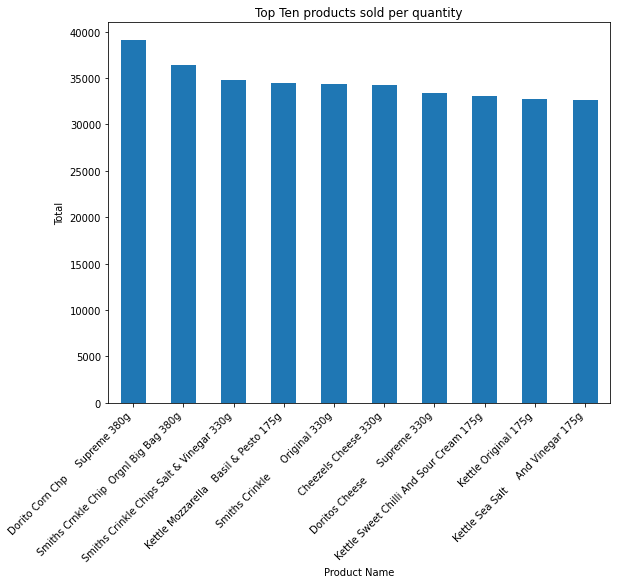

In [72]:
#what are the top 10 products sold in this period?

trans_pur_merged.groupby('PROD_NAME')['TOT_SALES'].sum().nlargest(10).plot(kind='bar',figsize=(9,7))
plt.xlabel('Product Name')
plt.ylabel('Total')
plt.title('Top Ten products sold per quantity')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

Dorito Corn Chp Supreme 380g is the product with the highest total sales over this period.

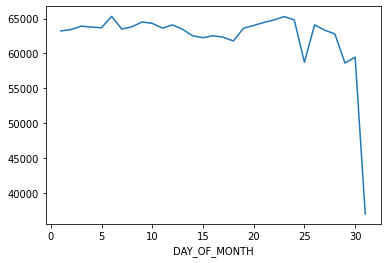

In [73]:
trans_pur_merged.groupby('DAY_OF_MONTH')['TOT_SALES'].sum().plot()
plt.show()

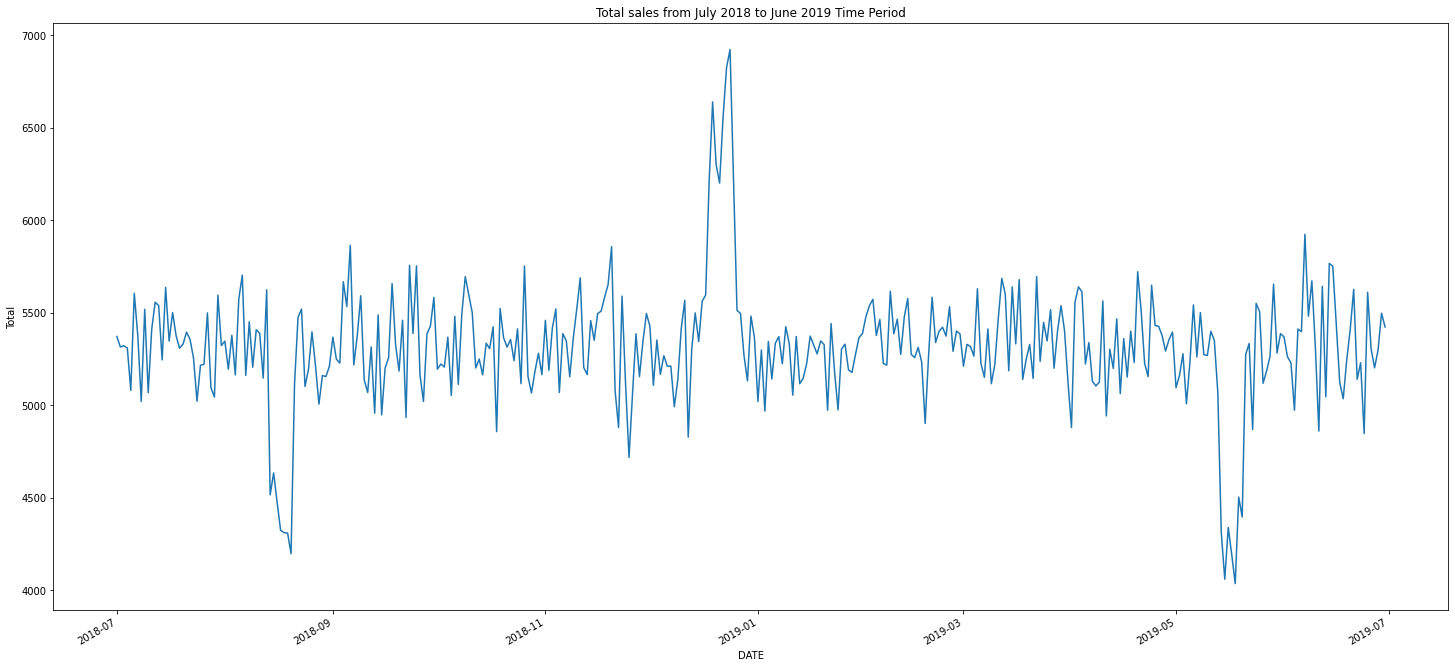

In [74]:
trans_pur_merged.groupby('DATE')['TOT_SALES'].sum().plot(title='Total sales from July 2018 to June 2019 Time Period', xlabel='DATE', ylabel='Total', figsize=(25,12))

plt.show()

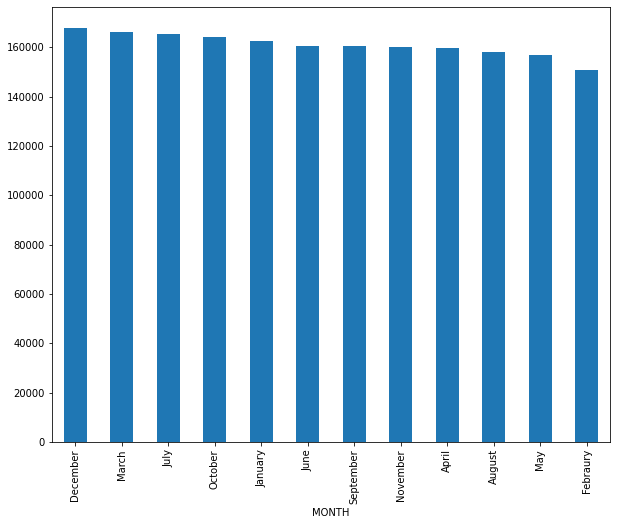

In [75]:
#Month with the highest total sales

trans_pur_merged.groupby('MONTH')['TOT_SALES'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 8))
plt.show()

Filtering rows that contains only chips as that is the area of Focus

There are 264833 chips products in the dataset.

In [110]:
#creating a chips only dataframe

chips_df = trans_pur_merged[~trans_pur_merged['PROD_NAME'].str.contains('Salsa')]
chips_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY_OF_MONTH,MONTH,PROD_SIZE,BRAND,BRAND1,BRAND2,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,17.0,October,175.0,Natural,Natural,Natural,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1.0,1002.0,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,16.0,September,150.0,Red,Red,Red,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1.0,1003.0,3.0,52.0,Grain Waves Sour Cream&Chives 210G,1.0,3.6,7.0,March,210.0,GrnWves,Grain,Grain,YOUNG FAMILIES,Budget
3,2019-03-08,1.0,1003.0,4.0,106.0,Natural ChipCo Hony Soy Chckn175g,1.0,3.0,8.0,March,175.0,Natural,Natural,Natural,YOUNG FAMILIES,Budget
4,2018-11-02,1.0,1004.0,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,2.0,November,160.0,Woolworths,WW,WW,OLDER SINGLES/COUPLES,Mainstream


In [111]:
len(chips_df) #confirming the number of rows filtered

246739

In [112]:
#count of brands by chips only
chips_df['BRAND'].value_counts()

Kettle        41288
Smiths        30352
Doritos       25224
Pringles      25102
Red           16321
Infuzions     14201
Thins         14075
Woolworths    11836
Cobs           9693
Tostitos       9471
Twisties       9454
GrnWves        7740
Natural        7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: BRAND, dtype: int64

In [113]:
#what chip pack sizes are sold the most?

chips_df['PROD_SIZE'].value_counts()

175.0    66389
150.0    40203
134.0    25102
110.0    22387
170.0    19983
165.0    15297
330.0    12540
380.0     6416
270.0     6285
210.0     6272
200.0     4473
135.0     3257
250.0     3169
90.0      3008
190.0     2995
160.0     2970
220.0     1564
70.0      1507
180.0     1468
125.0     1454
Name: PROD_SIZE, dtype: int64

Products of size 175g are the most bought size. Top 5 popular sizes among chips in decreasing order include:
175g,
150g,
134g
110g,
and 170g.

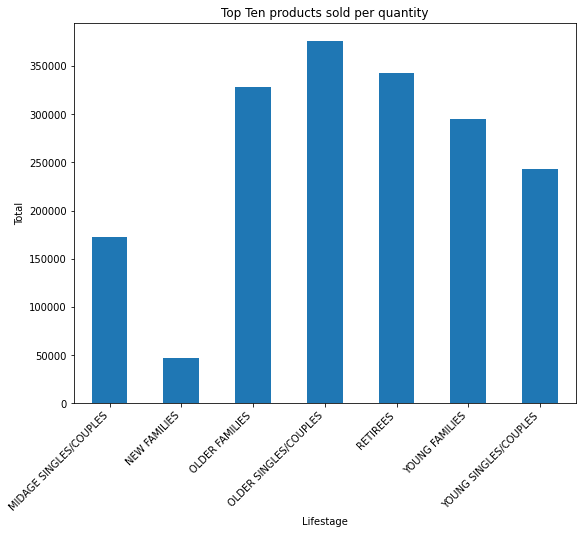

In [114]:
#what lifestage category spends the most on chips?

chips_df.groupby('LIFESTAGE')['TOT_SALES'].sum().plot(kind='bar',figsize=(9,7))
plt.xlabel('Lifestage')
plt.ylabel('Total')
plt.title('Top Ten products sold per quantity')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

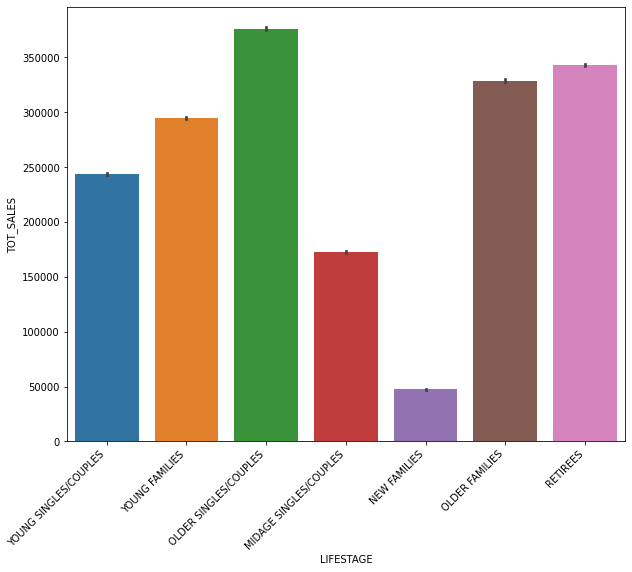

In [118]:
#visualizing total sales of chips per lifestage and premium customer
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='LIFESTAGE', y = 'TOT_SALES', data=chips_df, estimator=sum)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

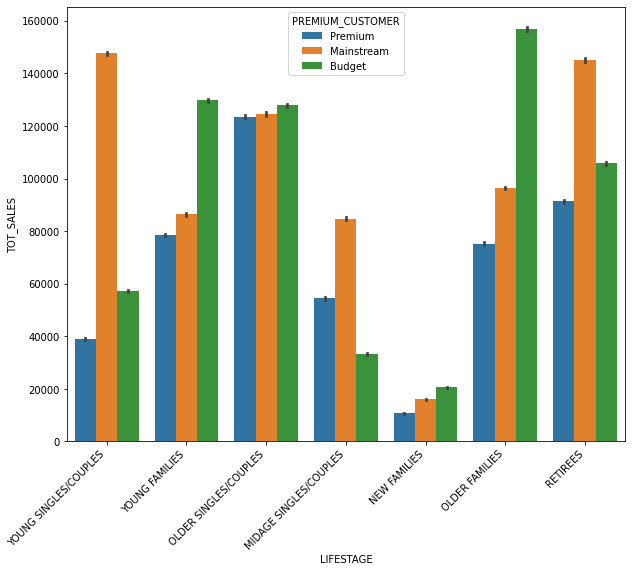

In [116]:
#visualizing total sales of chips per lifestage and premium customer
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='LIFESTAGE', y = 'TOT_SALES', data=chips_df, hue = 'PREMIUM_CUSTOMER', estimator=sum)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

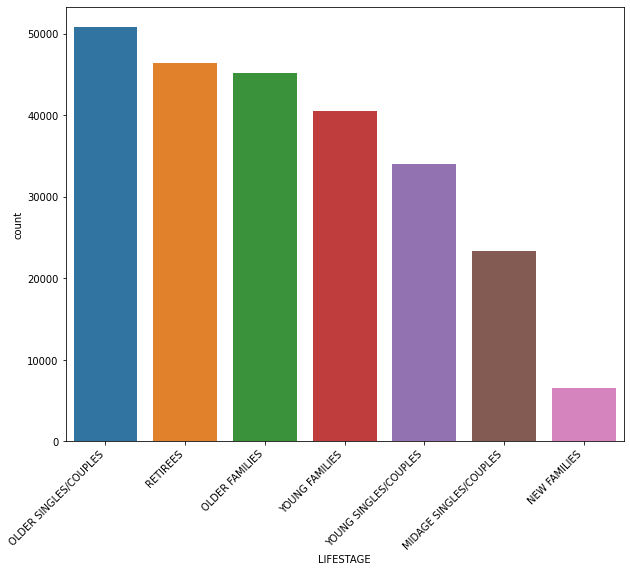

In [119]:
#How many customers are in each segment

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='LIFESTAGE', data=chips_df,  order=chips_df['LIFESTAGE'].value_counts().index, ax=ax)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [123]:
#How many customers are in each segment
chips_df['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     50792
RETIREES                  46431
OLDER FAMILIES            45158
YOUNG FAMILIES            40494
YOUNG SINGLES/COUPLES     33969
MIDAGE SINGLES/COUPLES    23398
NEW FAMILIES               6497
Name: LIFESTAGE, dtype: int64

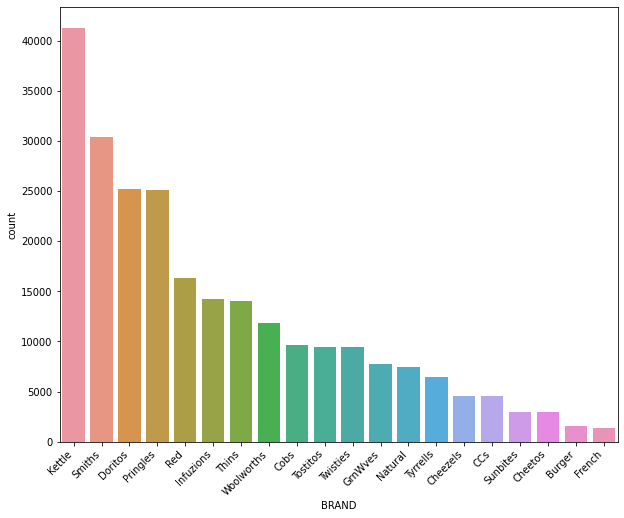

In [122]:


fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='BRAND', data=chips_df,  order=chips_df['BRAND'].value_counts().index, ax=ax)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

#CONCLUSION
1. From the plot 'Sum of Product Quantity per Lifestage per Customer Segment' above, Older families on a budget contribute the most in terms of total sales and product quantity. 
2. Mainstream customers make the most purchases, this is followed closely by budget customers and then finally, premium customers. This could be due to the fact that mainstream customers are higher in number than other categories. 
3. New families on a premium make the least purchases.
4. Sales drop on the last day of the month. 
5. Store number 226 has the highest amount of purchases. Factors such as location should be looked into to see if that is a factor contributing to the sales. 
6. The highest amount of sales are made in December.
7. Older singles/couples spend the most on chips while new families spend the least on chips.
8. Digging deeper based on type of premium customer, the three categories driving the sales of chips are Older families(budget), retirees(mainstream) and young singles/couples(mainstream). The categories also have the highest count of buyers which contributes to amount of sales. 
9. Kettle is the brand of chips that is bought the most among the buyers.

In [124]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [125]:
!jupyter nbconvert --to PDF "Quantium Data Analytics.pdf"

[NbConvertApp] WARNING | pattern 'Quantium Data Analytics.pdf' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--e